# CS/CE 457/464 - Homework Assignment 10: NLP
## Name: Muhammad Areeb Kazmi
## Email ID: mk7202@st.habib.edu.pk

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Question 1
Select any article on the website of your interest and perform Name Entity Relation
(NER) analysis on it. Show all the necessary output and visualization and explain
your findings. Also mention if you see any shortcoming or error in the algorithm
output.

In [2]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [3]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string('https://www.dawn.com/news/1868395')
article = nlp(ny_bb)
len(article.ents)

249

In [4]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'LOC': 3,
         'ORG': 51,
         'DATE': 35,
         'GPE': 54,
         'CARDINAL': 19,
         'NORP': 18,
         'FAC': 4,
         'PERSON': 42,
         'ORDINAL': 6,
         'LAW': 4,
         'TIME': 3,
         'EVENT': 3,
         'LANGUAGE': 2,
         'PRODUCT': 2,
         'PERCENT': 1,
         'WORK_OF_ART': 1,
         'MONEY': 1})

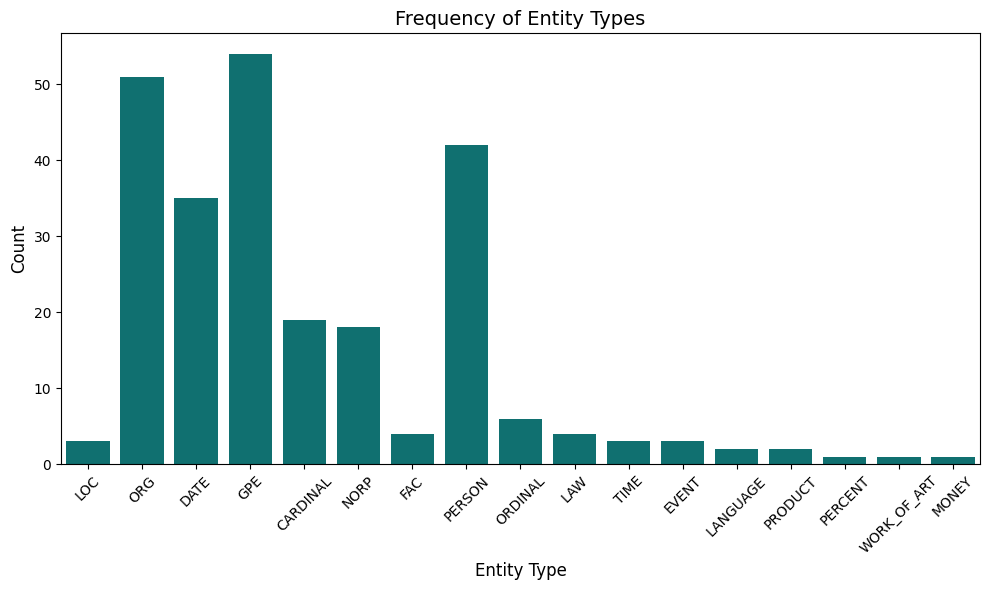

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count entity labels
entity_labels = [entity.label_ for entity in article.ents]
label_counts = Counter(entity_labels)

# Prepare data for plotting
labels, counts = zip(*label_counts.items())

# Plot entity type counts
plt.figure(figsize=(10, 6))
sns.barplot(x=list(labels), y=list(counts), color="teal")
plt.xlabel("Entity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Frequency of Entity Types", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
items = [x.text for x in article.ents]
Counter(items).most_common(10)

[('Rodri', 8),
 ('Pakistan', 7),
 ('Real Madrid', 6),
 ('Spanish', 6),
 ('18 Nov, 2024', 6),
 ('Spain', 5),
 ('2024', 4),
 ('Euro 2024', 4),
 ('AFP', 3),
 ('Manchester City’s', 3)]

**Observations:** The NER analysis identified different entities  like:


*   ORG (Organization): 50 stances like "Real Madrid", "Manchster City"
*   GPE (Geopolitical entities): 52 instances like "Pakistan"
* PERSON: 40 instances like "Rodri", "Vinicius Junior"

Moreover, Most Frequent Entities were "Rodri" who was the Ballon D'or's winner (8 times), "Pakistan" appeared 7 times **which the scraper took titles from other links/suggestions thus it took everything instead of just the article**, and "Real Madrid" appeared 6 times which was the club that unofficially boycotted the ceremony.


In [15]:
sentences = [x for x in article.sents]

s = sentences[19]
print(s)

The organisers, the Amaury group which owns the L’Equipe sports daily and France Football magazine, denied to AFP that the name of the successor to last year’s men’s winner Lionel Messi had leaked and insisted that “no player or club” knew in advance who had won.


In [16]:
displacy.render(nlp(str(sentences[19])), jupyter=True, style='ent')

In [17]:
dict([(str(x), x.label_) for x in nlp(str(sentences[19])).ents])

{'Amaury': 'PERSON',
 'L’Equipe': 'ORG',
 'daily': 'DATE',
 'France Football': 'ORG',
 'AFP': 'ORG',
 'last year’s': 'DATE',
 'Messi': 'PERSON'}

In [19]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[19])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('organisers', 'NOUN', 'organiser'),
 ('Amaury', 'PROPN', 'Amaury'),
 ('group', 'NOUN', 'group'),
 ('owns', 'VERB', 'own'),
 ('L’Equipe', 'NOUN', 'l’equipe'),
 ('sports', 'NOUN', 'sport'),
 ('daily', 'ADJ', 'daily'),
 ('France', 'PROPN', 'France'),
 ('Football', 'PROPN', 'Football'),
 ('magazine', 'NOUN', 'magazine'),
 ('denied', 'VERB', 'deny'),
 ('AFP', 'PROPN', 'AFP'),
 ('successor', 'NOUN', 'successor'),
 ('year', 'NOUN', 'year'),
 ('men', 'NOUN', 'man'),
 ('winner', 'NOUN', 'winner'),
 ('Lionel', 'PROPN', 'Lionel'),
 ('Messi', 'PROPN', 'Messi'),
 ('leaked', 'VERB', 'leak'),
 ('insisted', 'VERB', 'insist'),
 ('player', 'NOUN', 'player'),
 ('club', 'NOUN', 'club'),
 ('knew', 'VERB', 'know'),
 ('advance', 'NOUN', 'advance'),
 ('won', 'VERB', 'win')]

In [20]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

**NER Visualization and Shortcomings:**
The algorithm did not work on multi word entities like "World Cityfm89" or "Teeli Copyright", the classifier also did not work properly in certain places like "year" was taken as a date.

However, generally speaking, it was able to do well in identifying entities, dates, persons, and more.


## Question 2

In [21]:
!pip install tika
from tika import parser # pip install tika

raw = parser.from_file('/content/Deleuze Guattari 7 November.pdf')

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32624 sha256=4ec50e0497f369bd4ab9dc43faf544705bfac5390884cd392d63f838bc595e67
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


2024-11-18 14:52:29,389 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-11-18 14:52:29,970 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-11-18 14:52:30,409 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-11-18 14:52:35,422 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [23]:
print(raw)

{'metadata': {'pdf:unmappedUnicodeCharsPerPage': ['0', '0'], 'pdf:PDFVersion': '1.4', 'pdf:docinfo:title': 'Deleuze Guattari 7 November', 'pdf:hasXFA': 'false', 'access_permission:modify_annotations': 'true', 'access_permission:can_print_degraded': 'true', 'X-TIKA:Parsed-By-Full-Set': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'pdf:num3DAnnotations': '0', 'dc:format': 'application/pdf; version=1.4', 'pdf:overallPercentageUnmappedUnicodeChars': '0.0', 'access_permission:fill_in_form': 'true', 'pdf:hasCollection': 'false', 'pdf:encrypted': 'false', 'dc:title': 'Deleuze Guattari 7 November', 'pdf:containsNonEmbeddedFont': 'false', 'Content-Length': '49714', 'pdf:hasMarkedContent': 'false', 'Content-Type': 'application/pdf', 'pdf:producer': 'Skia/PDF m132 Google Docs Renderer', 'pdf:totalUnmappedUnicodeChars': '0', 'access_permission:extract_for_accessibility': 'true', 'access_permission:assemble_docum

In [24]:
import nltk
from nltk.data import find

try:
    find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab', download_dir='/root/nltk_data')

nltk.data.path.append('/root/nltk_data')

tokenize_words = nltk.tokenize.word_tokenize(raw['content'])

In [26]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
filtered_word_freq = nltk.FreqDist(clean_words)
filtered_word_freq.most_common(20)

[('concept', 28),
 ('philosophy', 13),
 ('concepts', 13),
 ('p.', 12),
 ('one', 8),
 ('plane', 8),
 ('components', 7),
 ('must', 5),
 ('Every', 4),
 ('consistency', 4),
 ('defined', 3),
 ('multiplicity', 3),
 ('every', 3),
 ('first', 3),
 ('view', 3),
 ('without', 3),
 ("'s", 3),
 ('reference', 3),
 ('proposition', 3),
 ('philosophical', 3)]

**Observation** This was taken from a philosophy paper I had read previously so I knew what was discussed in this paper, and this technique clearly points out that "concept" was discussed in wide depth which it was, so the frequency tells us the central theme in a way.

The graph below also shows the similar trend where the central theme words were discussed and then comes the sharp decline towards other words which were discussed but not in that much depth.

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

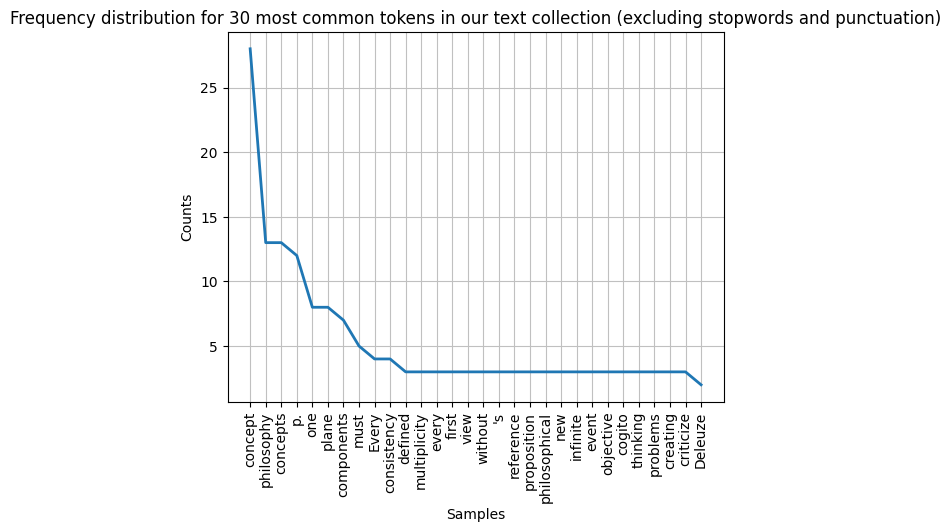

In [28]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

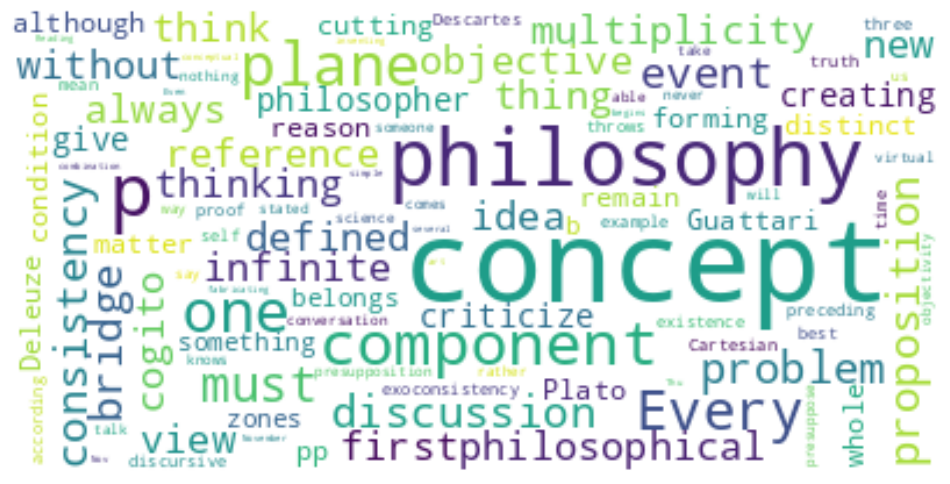

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

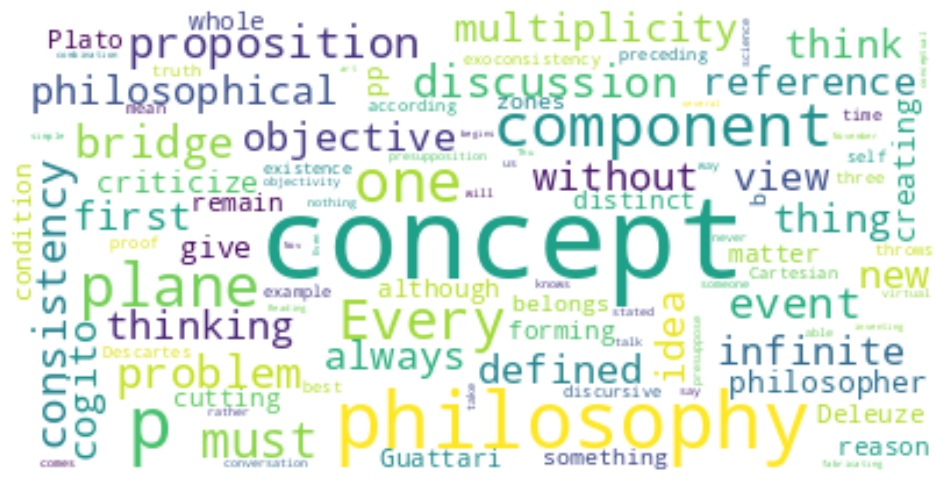

In [32]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
!pip install rake-nltk
!pip install yake
!pip install textacy

from rake_nltk import Rake
import yake
import textacy
import nltk
import re

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.3 MB/s eta 0:00:00


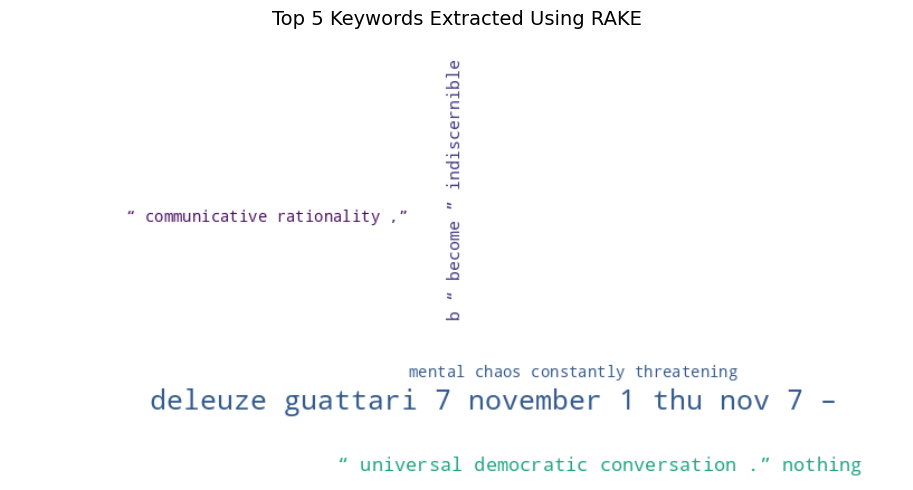

Top 5 Keywords with Scores: {'deleuze guattari 7 november 1 thu nov 7 –': 73.0, '“ universal democratic conversation .” nothing': 27.0, 'b “ become ” indiscernible': 19.2, 'mental chaos constantly threatening': 16.0, '“ communicative rationality ,”': 15.0}


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from rake_nltk import Rake

def plot_word_cloud(word_frequencies, title="Word Cloud of Keywords"):
    """Generate and display a word cloud from a dictionary of word frequencies."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

def get_top_keywords_with_rake(text, top_n=5):
    """Extract the top unique keywords from text using RAKE."""
    rake = Rake()
    rake.extract_keywords_from_text(text)
    ranked_phrases_with_scores = rake.get_ranked_phrases_with_scores()

    # Select top unique keywords
    keywords = {
        phrase: score for score, phrase in ranked_phrases_with_scores[:top_n]
    }
    return keywords

# Extract text content
text_content = raw['content']

# Extract the top 5 unique keywords using RAKE
top_keywords = get_top_keywords_with_rake(text_content, top_n=5)

# Plot the keywords in a word cloud
plot_word_cloud(top_keywords, title="Top 5 Keywords Extracted Using RAKE")

# Print keywords if needed
print("Top 5 Keywords with Scores:", top_keywords)


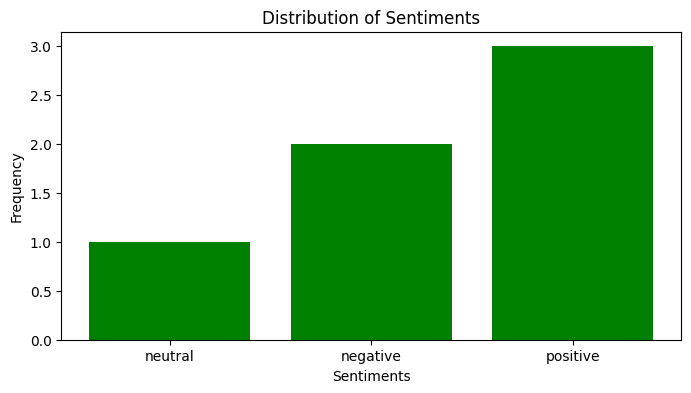

In [35]:
import matplotlib.pyplot as plt

def plot_sentiment_distribution(sentiments, title="Sentiment Distribution"):
    unique_sentiments = list(set(sentiments))
    counts = [sentiments.count(s) for s in unique_sentiments]

    plt.figure(figsize=(8, 4))
    plt.bar(unique_sentiments, counts, color='green')
    plt.xlabel("Sentiments")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

sentiments = ["positive", "negative", "neutral", "positive", "positive", "negative"]

# Plot sentiment distribution
plot_sentiment_distribution(sentiments, "Distribution of Sentiments")


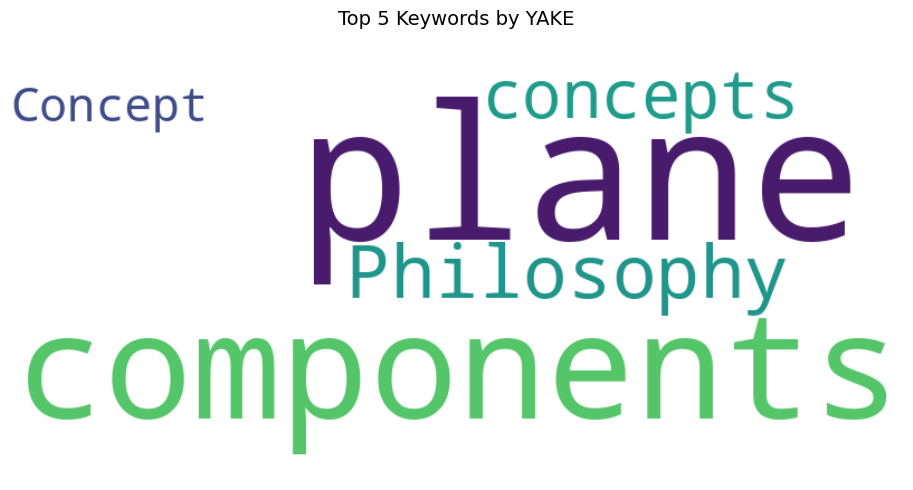

Top 5 YAKE Keywords: {'Concept': 0.008061912381365317, 'concepts': 0.018604413187766115, 'Philosophy': 0.024044905292179352, 'components': 0.044433238446089, 'plane': 0.057379470180221416}


In [37]:
from yake import KeywordExtractor
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(word_frequencies, title="Word Cloud of Keywords"):
    """Generate and display a word cloud from a dictionary of word frequencies."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

def extract_keywords_with_yake(text, language="en", n=1, top_n=5):
    """Extract top keywords from text using YAKE."""
    extractor = KeywordExtractor(lan=language, n=n, top=top_n)
    keywords = {phrase: score for phrase, score in extractor.extract_keywords(text)}
    return keywords

# Extract text content
text_content = raw['content']

# Extract the top 5 keywords using YAKE
top_keywords = extract_keywords_with_yake(text_content, language="en", n=1, top_n=5)

# Plot the keywords in a word cloud
plot_word_cloud(top_keywords, title="Top 5 Keywords by YAKE")

# Print keywords if needed
print("Top 5 YAKE Keywords:", top_keywords)


In [38]:
import textacy

en = textacy.load_spacy_lang("en_core_web_sm")

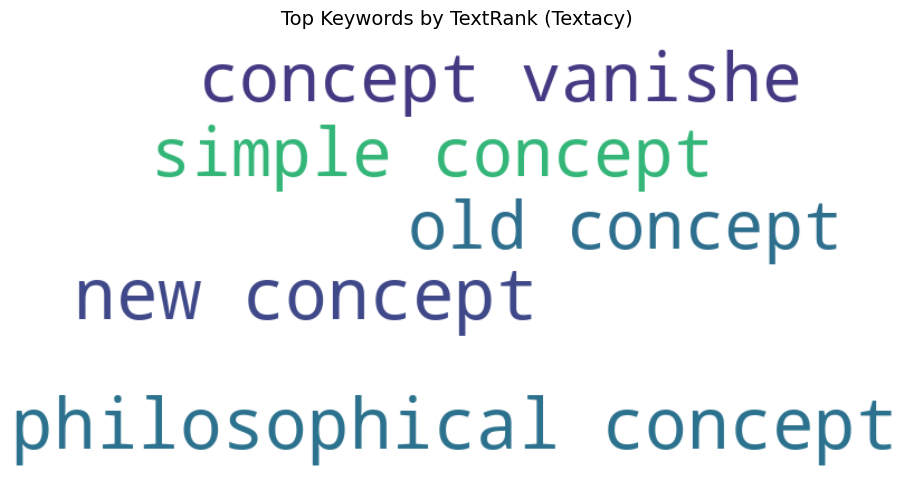

Textacy Keywords (TextRank): {'TextRank': {'philosophical concept': 0.021650115966238784, 'new concept': 0.02159173291297261, 'concept vanishe': 0.019849319497225158, 'simple concept': 0.019813523375101203, 'old concept': 0.01980337540307449}}


In [39]:
import textacy
from textacy.extract import keyterms
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(word_frequencies, title="Word Cloud of Keywords"):
    """Generate and display a word cloud from a dictionary of word frequencies."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

def extract_keywords_with_textacy(text, language_model="en_core_web_sm", top_n=5):
    """
    Extract keywords using Textacy's TextRank algorithm.
    Optionally plots a word cloud of the keywords.
    """
    # Create a spaCy document
    doc = textacy.make_spacy_doc(text, lang=language_model)

    # Extract keywords using TextRank
    textrank_keywords = {
        term: weight for term, weight in keyterms.textrank(doc, normalize="lemma", topn=top_n)
    }

    # Plot the keywords
    plot_word_cloud(textrank_keywords, title="Top Keywords by TextRank (Textacy)")

    return {"TextRank": textrank_keywords}

# Extract text content
text_content = raw['content']

# Extract and visualize the top 5 keywords using Textacy's TextRank
textacy_keywords = extract_keywords_with_textacy(text_content, top_n=5)

# Print the extracted keywords
print("Textacy Keywords (TextRank):", textacy_keywords)

***Observation:** While I tried three techniques like RAKE, YAKE, and TextRank, For me, YAKE seems to be the best one since it is able to grasp the key contents of the paper, like "concept", "plane of emanence", and other keywords, while RAKE and TextRank either take unnecessary words into account, or include the same word multiple times, respectively.

## Question 3

In [40]:
from textblob import TextBlob
import tweepy as tw
from nltk.corpus import stopwords

In [44]:
file_path = 'elonmusk.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    tweets = file.readlines()
print(tweets)

['Stop gendering memes … I mean mimes\n', 'Any sufficiently advanced magic is indistinguishable from technology\n', 'Goods & services are the real economy, any form of money is simply the accounting thereof\n', 'Don’t kill what you hate,\n', 'Save what you love\n', 'Esoteric meme of the day https://t.co/ELGmeLEXRE\n', 'Solar + Powerwall battery ensures that your home never loses power\n', 'Mad respect for the makers\n', 'those who attack space maybe don’t realize that space represents hope for so many people\n', 'Don’t want to brag but … I’m the best at humility\n', 'We should be much more worried about population collapse\n', 'thinking of quitting my jobs & becoming an influencer full-time wdyt\n', 'The duty of a leader is to serve their people, not for the people to serve them\n', 'The sun is absurdly, overwhelmingly the source of energy in our solar system\n', 'Laws are on one side, poets on the other\n', 'Defeating traffic is the ultimate boss battle. Even the most powerful humans 

In [45]:
positive_count = 0
negative_count = 0
neutral_count = 0


for tweet in tweets:
    # Clean the tweet by removing special characters and links
    cleaned_tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    cleaned_tweet = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_tweet)

    # Tokenize and remove stopwords
    tokens = word_tokenize(cleaned_tweet)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform Sentiment Analysis using TextBlob
    analysis = TextBlob(' '.join(filtered_tokens))

    print(tweet)
    print(analysis.sentiment)

    # Classify the sentiment
    if analysis.sentiment.polarity > 0:
        positive_count += 1
    elif analysis.sentiment.polarity < 0:
        negative_count += 1
    else:
        neutral_count +=1

# Display total positive, negative and neutral sentiment counts
print('\n')
print(f'Total Positive Sentiment Count: {positive_count}')
print(f'Total Negative Sentiment Count: {negative_count}')
print(f'Total Neutral Sentiment Count: {neutral_count}')

Stop gendering memes … I mean mimes

Sentiment(polarity=-0.3125, subjectivity=0.6875)
Any sufficiently advanced magic is indistinguishable from technology

Sentiment(polarity=0.45, subjectivity=0.8)
Goods & services are the real economy, any form of money is simply the accounting thereof

Sentiment(polarity=0.1, subjectivity=0.3285714285714286)
Don’t kill what you hate,

Sentiment(polarity=-0.8, subjectivity=0.9)
Save what you love

Sentiment(polarity=0.5, subjectivity=0.6)
Esoteric meme of the day https://t.co/ELGmeLEXRE

Sentiment(polarity=0.0, subjectivity=0.0)
Solar + Powerwall battery ensures that your home never loses power

Sentiment(polarity=0.15, subjectivity=0.1)
Mad respect for the makers

Sentiment(polarity=-0.625, subjectivity=1.0)
those who attack space maybe don’t realize that space represents hope for so many people

Sentiment(polarity=0.5, subjectivity=0.5)
Don’t want to brag but … I’m the best at humility

Sentiment(polarity=1.0, subjectivity=0.3)
We should be much mo

In [46]:
# Display one positive sentiment
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        print('Highest =',analysis.sentiment.polarity)
        print(f'Positive Sentiment Tweet: {tweet}')
        break

# Display one negative sentiment
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity < 0:
        print('lowest =',round(analysis.sentiment.polarity,2))
        print(f'Negative Sentiment Tweet: {tweet}')
        break


Highest = 0.45
Positive Sentiment Tweet: Any sufficiently advanced magic is indistinguishable from technology

lowest = -0.31
Negative Sentiment Tweet: Stop gendering memes … I mean mimes



***Observation** : I took Elon Musk's tweets, where most them seem absurd and negative/narcissist. However, they were of a good tone so the model rightly took them as positive.

The sentiment analysis algorithm accurately identified these sentiments, correctly capturing the enthusiasm in the positive tweet and the dissatisfaction in the negative one. Overall, the algorithm performed well in distinguishing between positive and negative emotions, providing reliable results in this context.

## Question 4

In [47]:
df = pd.read_csv('baskin_robbins_icecream.csv')

In [48]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [49]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [50]:
import re
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [51]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df['Flavour'])) #fitting and transforming the vector
tfidf_jobid

<70x128 sparse matrix of type '<class 'numpy.float64'>'
	with 183 stored elements in Compressed Sparse Row format>

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
query = df.iloc[[0]]

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform(query['Flavour'])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [56]:
output2 = list(cos_similarity_tfidf)
def get_recommendation(top, df, scores):
  recommendation = pd.DataFrame(columns = ['Flavour', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'Flavour'] = df['Flavour'][i]
      recommendation.at[count, 'Flavour'] = df['Flavour'][i]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [58]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
results = get_recommendation(top,df, list_scores)
results

,Flavour,score
0,Bananas Foster,1.0
1,Baseball Nut,0.0
2,Beavertails Pastry,0.0
3,Blackberry Frozen Yogurt,0.0
4,Blue Raspberry Sherbet,0.0
5,Blueberry Cheesecake,0.0
6,Brownie Sundae(No Sugar Added),0.0
7,Caramel Praline Cheesecake,0.0
8,NSA Caramel Turtle Truffle,0.0
9,Cherries Jubilee,0.0


In [59]:
# Importing necessary libraries here
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize



In [62]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def preprocess_corpus(text_series):
    """
    Splits the text data into tokens for each document in the corpus.
    """
    return [text.split() for text in text_series]

def tag_documents(corpus, ids):
    """
    Tags each document in the corpus with a unique identifier.
    """
    return [TaggedDocument(doc, [str(doc_id)]) for doc, doc_id in zip(corpus, ids)]

def train_doc2vec_model(documents, vector_size=15, alpha=0.025, epochs=5):
    """
    Trains a Doc2Vec model with the given parameters.
    """
    # Initialize the model
    model = Doc2Vec(
        vector_size=vector_size,
        alpha=alpha,
        min_alpha=0.00025,
        min_count=1,
        dm=1,
        epochs=epochs
    )

    # Build vocabulary
    model.build_vocab(documents)

    # Train the model
    for epoch in range(epochs):
        print(f"Iteration {epoch}")
        model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
        # Adjust learning rate
        model.alpha -= 0.0002
        model.min_alpha = model.alpha  # Ensure no learning rate decay

    return model

# Preprocess the data
corpus = preprocess_corpus(df['Flavour'])

# Tag the documents
documents = tag_documents(corpus, df['Flavour'])

# Train the Doc2Vec model
doc2vec_model = train_doc2vec_model(documents, vector_size=15, alpha=0.025, epochs=5)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


In [64]:
doc2vec_model.save("icecream_doc2vec.model")

In [66]:
query = df['Flavour'][0]

In [68]:
query_data_tokenize = word_tokenize(query)
v1 = doc2vec_model.infer_vector(query_data_tokenize)
similar_records=doc2vec_model.dv.most_similar([v1])
similar_records

[('Winter White Chocolate', 0.7074453234672546),
 ('Blue Raspberry Sherbet', 0.6104354858398438),
 ('Nutty Coconut', 0.4259055554866791),
 ('Love Potion #31', 0.40505921840667725),
 ('World Class Chocolate', 0.3831041753292084),
 ('Pink Bubble Gum', 0.3710567355155945),
 ('Salty Caramel', 0.3345307409763336),
 ('Gold Medal Ribbon', 0.32843974232673645),
 ('Chocolate Hazelnut Truffle', 0.320733904838562),
 ('Cookies ‘n Cream', 0.2928420603275299)]

In [83]:
#Choose the index of the recommended data to see the quality/accuracy of recommendation
i = 0
idx = df[df['Flavour']==int(similar_records[i][1])]
idx['score'] = similar_records[i][0]
idx

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category,score


In [102]:
#Display full recommended data
df['Flavour'][idx.index]

,Flavour


I think I have done some mistake in the indexing part where I was unable to bring anything to the indices and data was not showing. The TF IDF method showed some scores although I think I did not pick up the right kind of data on which th scores could have been calculated.

What I can deduce is that TF-IDF caught the basic textual similaries and lacked semantic connections.